Matplotlib is building the font cache; this may take a moment.


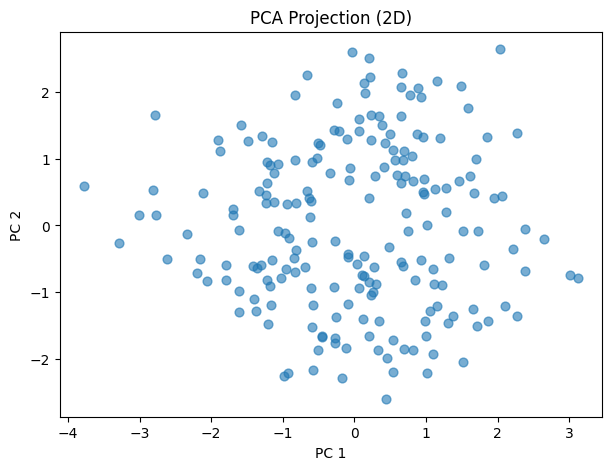

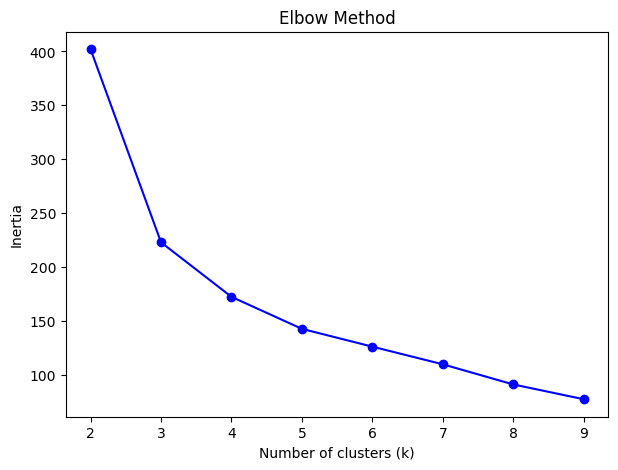

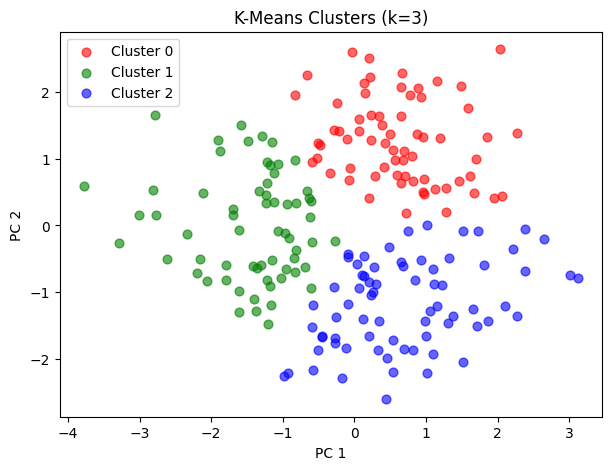

Cluster Summary:
   Cluster  MonthlyCharges  TotalCharges     tenure     Churn
0        0       79.550152   3852.495606  42.454545  0.818182
1        1       52.291270   4886.170159  22.365079  0.714286
2        2       72.702535   3438.068732  38.112676  0.028169


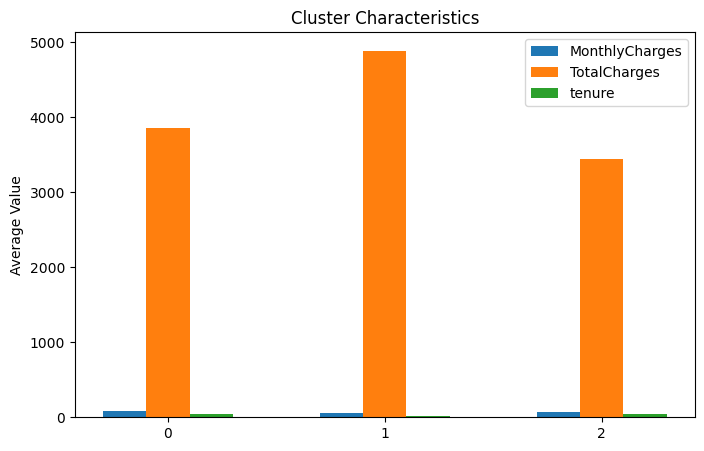

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# -----------------------------
# 1. Create synthetic dataset
# -----------------------------
np.random.seed(42)
df = pd.DataFrame({
    'gender': np.random.choice(['Male', 'Female'], 200),
    'SeniorCitizen': np.random.randint(0, 2, 200),
    'Partner': np.random.choice(['Yes', 'No'], 200),
    'Dependents': np.random.choice(['Yes', 'No'], 200),
    'tenure': np.random.randint(0, 72, 200),
    'PhoneService': np.random.choice(['Yes', 'No'], 200),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], 200),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], 200),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], 200),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], 200),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], 200),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], 200),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], 200),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], 200),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], 200),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], 200),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 
                                       'Bank transfer (automatic)', 'Credit card (automatic)'], 200),
    'MonthlyCharges': np.round(np.random.uniform(20, 120, 200), 2),
    'TotalCharges': np.round(np.random.uniform(20, 8000, 200), 2),
    'Churn': np.random.choice(['Yes', 'No'], 200)
})

# -----------------------------
# 2. Preprocessing
# -----------------------------
# Encode categorical columns
for col in df.select_dtypes('object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# -----------------------------
# 3. PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA scatter plot
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=40, alpha=0.6)
plt.title('PCA Projection (2D)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# -----------------------------
# 4. Elbow method for KMeans
# -----------------------------
inertia = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# -----------------------------
# 5. K-Means clustering
# -----------------------------
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Cluster scatter plot
plt.figure(figsize=(7,5))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for c in range(best_k):
    plt.scatter(X_pca[clusters==c,0], X_pca[clusters==c,1], 
                s=40, alpha=0.6, color=colors[c], label=f'Cluster {c}')
plt.title(f'K-Means Clusters (k={best_k})')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

# -----------------------------
# 6. Cluster analysis
# -----------------------------
df['Cluster'] = clusters
summary = df.groupby('Cluster').agg({
    'MonthlyCharges':'mean',
    'TotalCharges':'mean',
    'tenure':'mean',
    'Churn':'mean'
}).reset_index()

print("Cluster Summary:")
print(summary)

# Plot cluster characteristics
plt.figure(figsize=(8,5))
x = np.arange(len(summary['Cluster']))
width = 0.2

plt.bar(x - width, summary['MonthlyCharges'], width, label='MonthlyCharges')
plt.bar(x, summary['TotalCharges'], width, label='TotalCharges')
plt.bar(x + width, summary['tenure'], width, label='tenure')
plt.xticks(x, summary['Cluster'])
plt.ylabel('Average Value')
plt.title('Cluster Characteristics')
plt.legend()
plt.show()
